## Box Plot

The box plot is a compact distribution summary. It takes up less space than a histogram and contains less information but it is great for comparing groups. It shows the spread of all the different datapoints. 

## 1. Summarise the history of the box plot and situations in which it used

### a. History of the box plot
Box plots were invented by John Tukey in 1970, but it wasn't until his publication in 1977, "Exploratory Data Analysis", that they became widely known. Here is an example from his publication where he analysed the annual household per capita expenditures between the seven Vietnamese regions.
![boxplot_jtukey](boxplot_jtukey.png)

### b. Situations in which it used

Box plots are good for comparison because the distribution is immediately clear. 

It is used in statistics analysis....
in a Tukey boxplot values outside 1.5 times the inter-quartile from the first or third quartile would be considered as outliers and displayed as simple points.

Box plots are made up of:

- Median
- upper quartile
- lower quartile
- outliers

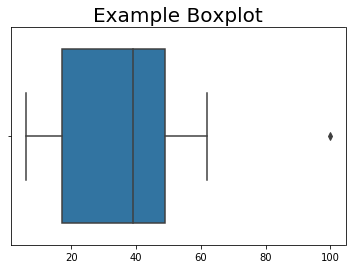

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data = [51, 17, 25, 39, 7, 49, 62, 41, 20, 6, 43, 13, 100]

ax = sns.boxplot(x=data)

ax.set_title('Example Boxplot',fontsize=20)
ax

## 2. Demonstrate the use of the box plot using data of your choosing

Data = Dungarvan (Clonea) Rainfall Data

Published by: Met Éireann

rain:  -  Precipitation Amount (mm)

https://data.gov.ie/dataset/dungarvan-clonea-rainfall-data

In [3]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [4]:
# we need to skip the first 9 rows as it is full of notes
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/dly2007.csv",skiprows=9)
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html
# convert date column to date time 
df['date'] = pd.to_datetime(df['date'])
df

,date,ind,rain
0,1995-11-01,0,0.0
1,1995-11-02,0,0.0
2,1995-11-03,0,0.9
3,1995-11-04,0,5.9
4,1995-11-05,4,0.0
5,1995-11-06,0,5.1
6,1995-11-07,0,1.6
7,1995-11-08,0,7.9
8,1995-11-09,0,6.2
9,1995-11-10,0,5.8


In [5]:
# Set the datetime column as the index
df.index = df['date'] 

# create a new column for month
df['month'] = df['date'].dt.strftime('%b')

# create a new column for year
df['year'] = df['date'].dt.strftime('%Y')

df

,date,ind,rain,month,year
date,,,,,
1995-11-01,1995-11-01,0,0.0,Nov,1995
1995-11-02,1995-11-02,0,0.0,Nov,1995
1995-11-03,1995-11-03,0,0.9,Nov,1995
1995-11-04,1995-11-04,0,5.9,Nov,1995
1995-11-05,1995-11-05,4,0.0,Nov,1995
1995-11-06,1995-11-06,0,5.1,Nov,1995
1995-11-07,1995-11-07,0,1.6,Nov,1995
1995-11-08,1995-11-08,0,7.9,Nov,1995
1995-11-09,1995-11-09,0,6.2,Nov,1995


In [6]:
# group by year
# Describing a column, rain, from a DataFrame by accessing it as an attribute.
print(df.groupby('year').rain.describe())

      count      mean       std  min  25%  50%  75%   max
year                                                     
1995   61.0  4.585246  8.028155  0.0  0.0  0.7  5.8  36.8
1996  366.0  3.359836  6.395919  0.0  0.0  0.3  3.5  38.0
1997  243.0  2.975720  8.755821  0.0  0.0  0.1  2.6  89.6


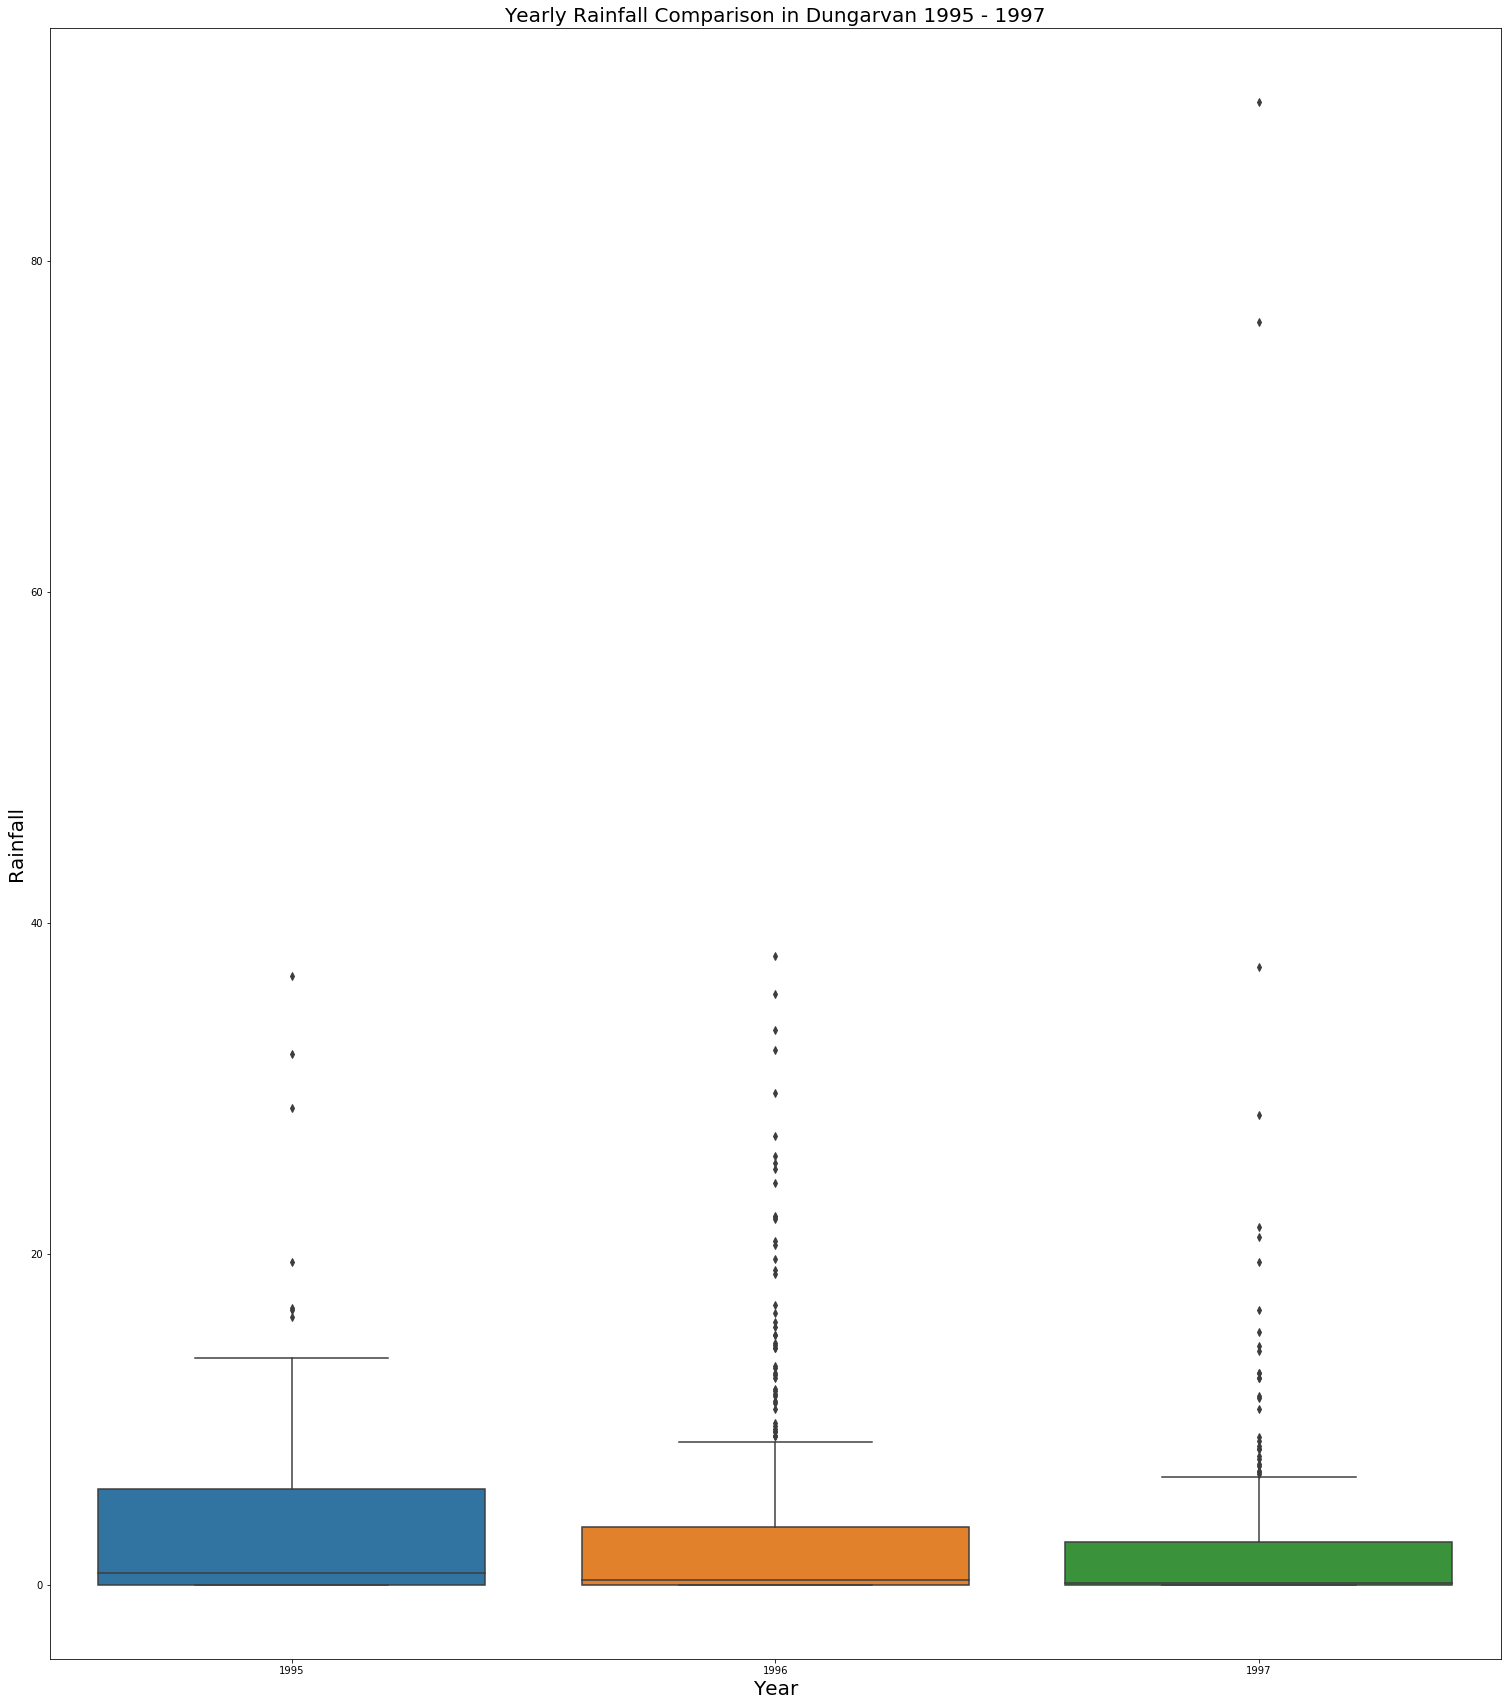

In [11]:
%matplotlib inline

fig, ax = plt.subplots()
fig.set_size_inches((26,30))
plot = sns.boxplot(x = df['year'], y = df['rain'])

plot.set_title('Yearly Rainfall Comparison in Dungarvan 1995 - 1997',fontsize=20)
plot.set_ylabel('Rainfall',fontsize=20)
plot.set_xlabel('Year',fontsize=20)

plt.show()

# References

https://en.wikipedia.org/wiki/Box_plot
    
http://theta.edu.pl/wp-content/uploads/2012/10/exploratorydataanalysis_tukey.pdf

http://vita.had.co.nz/papers/boxplots.pdf

https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch12/5214889-eng.htm

https://chrisalbon.com/python/data_wrangling/pandas_group_data_by_time/

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.strftime.html

https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/stats-box-whisker-plots/v/reading-box-and-whisker-plots

https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots